In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np 
import pandas as pd 
import cv2
import os

for dirname, _, filenames in os.walk('/content/drive/MyDrive/Heart'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Heart/o2Saturation.csv
/content/drive/MyDrive/Heart/heart.csv
/content/drive/MyDrive/Heart/gt98.csv
/content/drive/MyDrive/Heart/lt98.csv
/content/drive/MyDrive/Heart/os.rar


In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Heart/heart.csv')

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.sample(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3,0
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3,0
19,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
#Data Cleaning
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [12]:
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

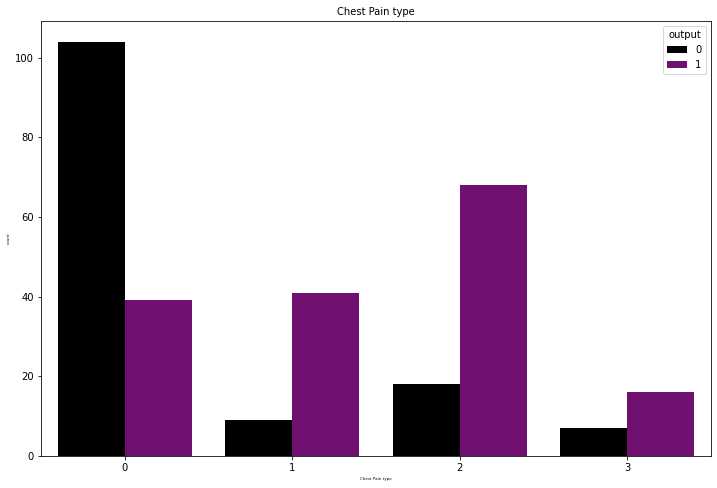

In [86]:
#Data visualization & getting analysis
#Chest Pain type
plt.figure(figsize=(12,8))
sns.countplot('cp',hue='output',data=df ,palette=['black','purple'])
plt.title("Chest Pain type",size=10)
plt.xlabel("Chest Pain type",size=4)
plt.ylabel("count",size=4)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

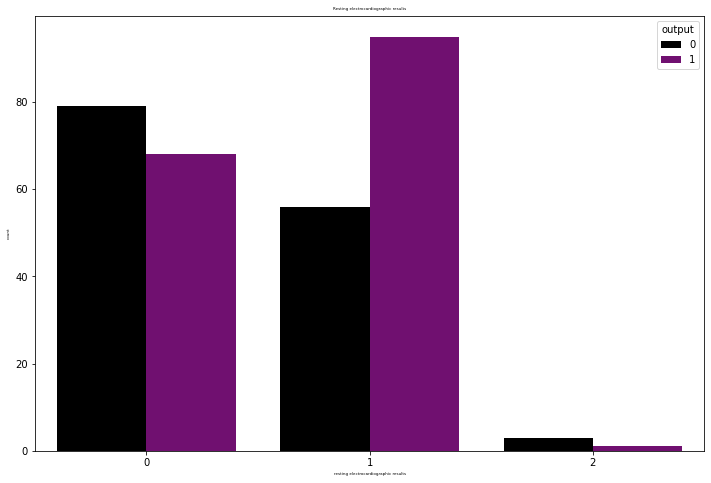

In [87]:
#resting electrocardiographic results
plt.figure(figsize=(12,8))
sns.countplot('restecg',hue='output',data=df,palette=['black','purple'])
plt.title("Resting electrocardiographic results",size=4)
plt.xlabel("resting electrocardiographic results",size=4)
plt.ylabel("count",size=4)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

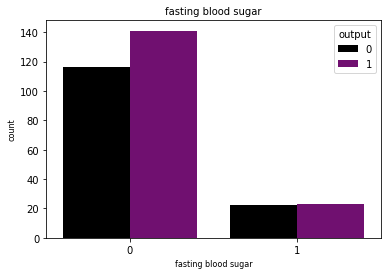

In [88]:
#fasting blood sugar
plt.figure(figsize=(6,4))
sns.countplot('fbs',hue='output',data=df,palette=['black','purple'])
plt.title("fasting blood sugar",size=10)
plt.xlabel("fasting blood sugar",size=8)
plt.ylabel("count",size=8)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

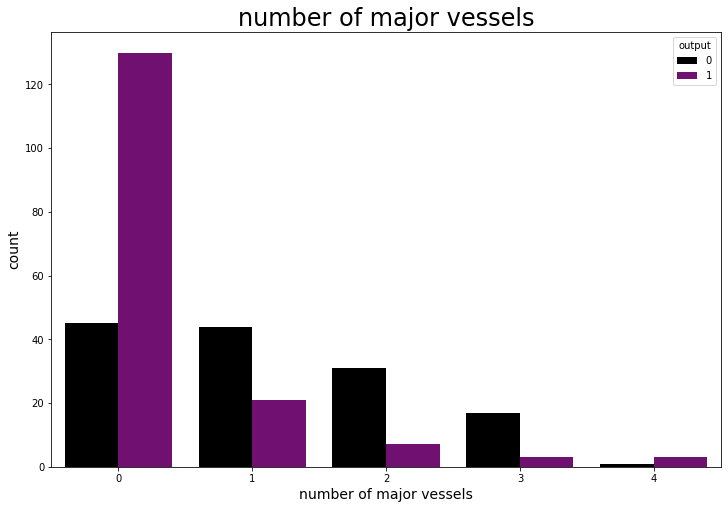

In [89]:
#number of major vessels
plt.figure(figsize=(12,8))
sns.countplot('caa',hue='output',data=df,palette=['black','purple'])
plt.title("number of major vessels",size=24)
plt.xlabel("number of major vessels",size=14)
plt.ylabel("count",size=14)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

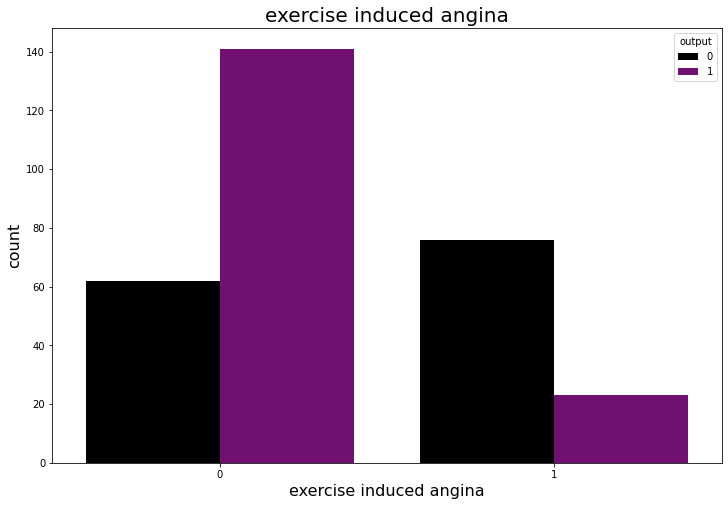

In [90]:
#exercise induced angina
plt.figure(figsize=(12,8))
sns.countplot('exng',hue='output',data=df,palette=['black','purple'])
plt.title("exercise induced angina",size=20)
plt.xlabel("exercise induced angina",size=16)
plt.ylabel("count",size=16)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'count')

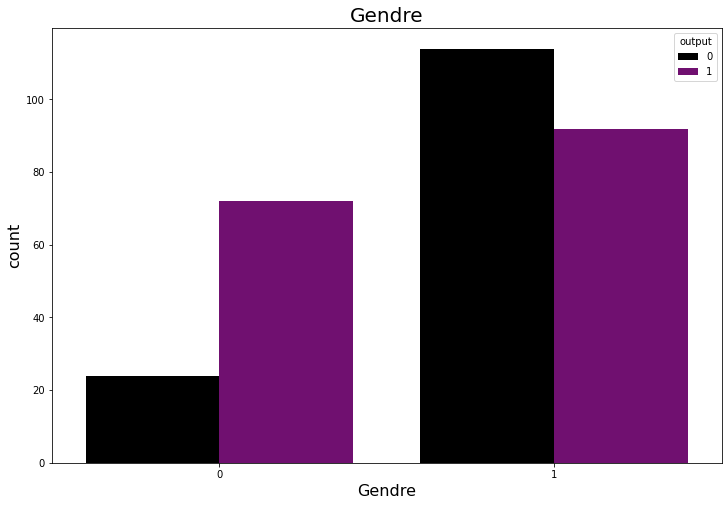

In [91]:
#Gendre
plt.figure(figsize=(12,8))
sns.countplot('sex',hue='output',data=df,palette=['black','purple'])
plt.title("Gendre",size=20)
plt.xlabel("Gendre",size=16)
plt.ylabel("count",size=16)

Text(0, 0.5, 'count')

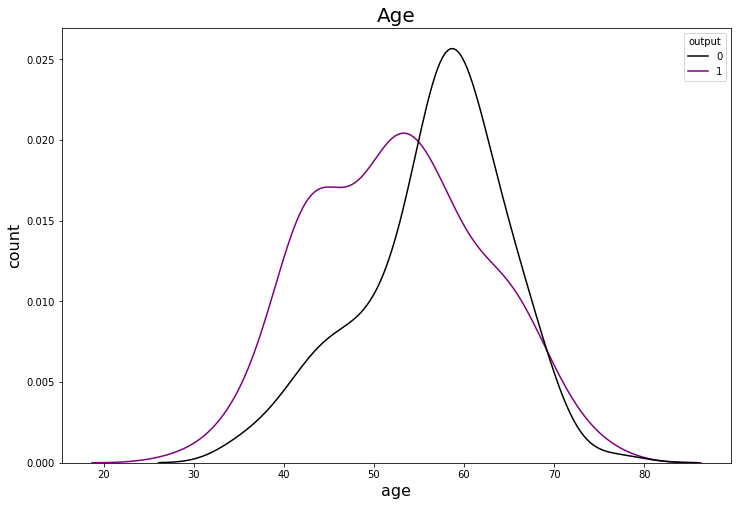

In [92]:
#Age
plt.figure(figsize=(12,8))
sns.kdeplot('age',hue='output',data=df,palette=['black','purple'])
plt.title("Age",size=20)
plt.xlabel("age",size=16)
plt.ylabel("count",size=16)

Text(0, 0.5, 'count')

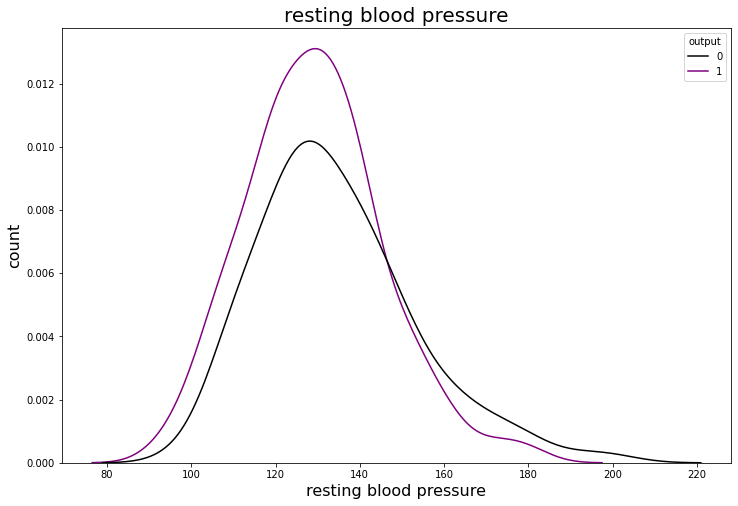

In [93]:
#resting blood pressure
plt.figure(figsize=(12,8))
sns.kdeplot('trtbps',hue='output',data=df,palette=['black','purple'])
plt.title("resting blood pressure",size=20)
plt.xlabel("resting blood pressure",size=16)
plt.ylabel("count",size=16)

Text(0, 0.5, 'count')

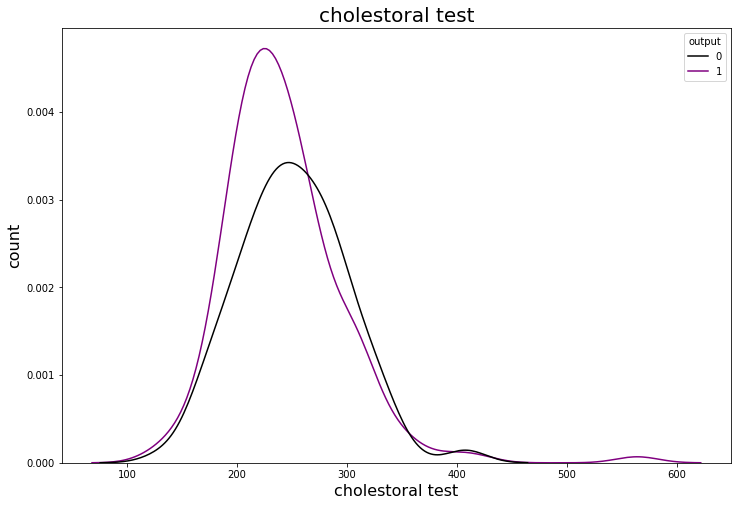

In [94]:
plt.figure(figsize=(12,8))
sns.kdeplot('chol',hue='output',data=df,palette=['black','purple'])
plt.title("cholestoral test",size=20)
plt.xlabel("cholestoral test",size=16)
plt.ylabel("count",size=16)

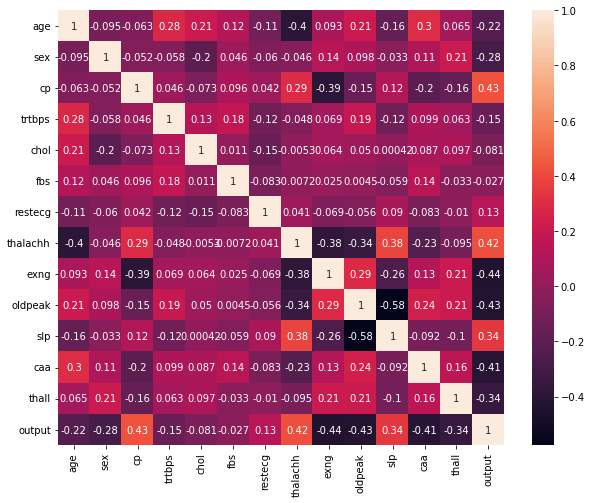

In [96]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [23]:
# Creating dataframe by iterating through filepaths
import pathlib 
Normal_o2s= pathlib.Path("/content/drive/MyDrive/Heart/lt98.csv")
little_high=pathlib.Path("/content/drive/MyDrive/Heart/gt98.csv")

In [27]:
import csv
results = {}
dirlist = [Normal_o2s, little_high]
classes = ['No', 'Yes']
for file, list in zip(classes, dirlist):
    with open(list) as csvfile:
        reader = csv.reader(csvfile)
        count = 0
        for row in reader:
            count += 1
        results[list] = count

for key, value in results.items():
    print(key, value)

/content/drive/MyDrive/Heart/lt98.csv 1467
/content/drive/MyDrive/Heart/gt98.csv 2119


In [36]:
from sklearn.preprocessing import StandardScaler
x = df.drop('output', axis=1)
y = df['output']
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)


display(x.head())
display(y.head())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [38]:
saturation = pd.read_csv('/content/drive/MyDrive/Heart/o2Saturation.csv')
saturation = saturation.rename(columns={'98.6' : 'o2Saturation'})
saturation.head()
saturation.shape

(3585, 1)

In [39]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [41]:
x = df.drop('output', axis=1)
y = df['output']
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)


display(x.head())
display(y.head())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, RandomizedSearchCV, cross_val_score
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x_scaled = scaler.transform(raw_train_x)
test_x_scaled = scaler.transform(raw_test_x)

In [47]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
paramns = {
    'criterion' : ['gini', 'entropy'],
    "max_depth" : [1, 3, 6, 9, 18,24, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
}

search_tree = RandomizedSearchCV(DecisionTreeClassifier(),
                    paramns,
                    cv = StratifiedKFold(n_splits = 5, shuffle=True), n_iter=62)
search_tree.fit(x, y)
results_tree = pd.DataFrame(search_tree.cv_results_)
results_tree.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002790,0.000567,0.001815,0.000280,gini,9,111,52,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.803279,0.737705,0.683333,0.766667,0.800000,0.758197,0.044443,2
1,0.002241,0.000213,0.001598,0.000110,entropy,18,74,72,"{'criterion': 'entropy', 'max_depth': 18, 'min...",0.655738,0.737705,0.683333,0.650000,0.800000,0.705355,0.056595,32
2,0.002133,0.000031,0.001500,0.000087,entropy,6,49,61,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.655738,0.770492,0.700000,0.650000,0.783333,0.711913,0.055970,30
3,0.002015,0.000037,0.001452,0.000035,entropy,6,101,99,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.803279,0.737705,0.683333,0.766667,0.800000,0.758197,0.044443,2
4,0.002240,0.000037,0.001465,0.000024,gini,None,35,36,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.786885,0.770492,0.650000,0.750000,0.783333,0.748142,0.050743,18


In [52]:
scores_tree = cross_val_score(search_tree, x, y, cv=StratifiedKFold(n_splits=6, shuffle=True))
scores_tree

array([0.76470588, 0.8627451 , 0.66      , 0.7       , 0.64      ,
       0.72      ])

In [53]:
search_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=112,
                       min_samples_split=111)

In [54]:
search_tree.best_score_

0.7614754098360657

In [57]:
from sklearn.ensemble import RandomForestClassifier
search_random_forest = RandomizedSearchCV(RandomForestClassifier(),
                    paramns,
                    cv = StratifiedKFold(n_splits = 6, shuffle=True), n_iter=62)
search_random_forest.fit(x, y)
results_random_forest = pd.DataFrame(search_random_forest.cv_results_)
results_random_forest.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.463214,0.217290,0.049434,0.033307,gini,1,55,110,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.745098,0.803922,0.88,0.80,0.84,0.76,0.804837,0.045624,19
1,0.149417,0.062943,0.010924,0.000691,entropy,None,41,118,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.784314,0.843137,0.86,0.80,0.92,0.78,0.831242,0.049414,4
2,0.119814,0.001908,0.011442,0.000672,entropy,None,60,32,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.745098,0.803922,0.88,0.82,0.90,0.74,0.814837,0.060703,12
3,0.121205,0.004613,0.011010,0.000765,entropy,6,58,126,"{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.784314,0.823529,0.86,0.78,0.84,0.74,0.804641,0.040560,20
4,0.116701,0.004740,0.010817,0.000522,entropy,3,96,59,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.549020,0.549020,0.54,0.54,0.54,0.54,0.543007,0.004252,34


In [70]:
from sklearn.svm import SVC
model_svc = SVC()
cross_svc = cross_validate(model_svc, x, y, cv=StratifiedKFold(n_splits=5, shuffle=True))

mean_svc = cross_svc['test_score'].mean()
std_svc = cross_svc['test_score'].std()

print(mean_svc * 100)
print('Accuracy: [%.2f, %.2f]' % ((mean_svc - 1.99 * std_svc) * 100, (mean_svc + 1.99 * std_svc) * 100))

66.55191256830601
Accuracy: [52.99, 80.11]


In [69]:
from sklearn.naive_bayes import BernoulliNB
model_ber = BernoulliNB()
cross_ber = cross_validate(model_ber, x, y, cv=StratifiedKFold(n_splits=5, shuffle=True))

mean_ber = cross_ber['test_score'].mean()
std_ber = cross_ber['test_score'].std()

print(mean_ber * 100)
print('Accuracy: [%.2f, %.2f]' % ((mean_ber - 1.99 * std_ber) * 100, (mean_ber + 1.99 * std_ber) * 100))

82.46994535519126
Accuracy: [71.14, 93.80]


In [62]:
model_rfc = search_random_forest.best_estimator_
model_rfc.fit(train_x_scaled, train_y)
predict_rfc = model_rfc.predict(test_x_scaled)

In [63]:
def get_metrics(test_y, predict):
    accuracy = accuracy_score(test_y, predict) * 100
    precision = precision_score(test_y, predict) * 100
    recall = recall_score(test_y, predict) * 100
    f1 = f1_score(test_y, predict) * 100
    return accuracy, precision, recall, f1

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
accuracy_rfc, precision_rfc, recall_rfc, f1_rfc = get_metrics(test_y, predict_rfc)
model_ber.fit(train_x_scaled, train_y)
predict_ber = model_ber.predict(test_x_scaled)
accuracy_ber, precision_ber, recall_ber, f1_ber = get_metrics(test_y, predict_ber)

In [66]:
index = ['Accuracy', 'Precision', 'Recall', 'F1']

In [67]:
compare = pd.DataFrame([accuracy_rfc, precision_rfc, recall_rfc, f1_rfc], columns=['RandomForestClassifier'], index=index)
compare = compare.assign(Naive = [accuracy_ber, precision_ber, recall_ber, f1_ber])
compare = compare.round(2)
compare

,RandomForestClassifier,Naive
Accuracy,83.52,86.81
Precision,79.31,86.27
Recall,93.88,89.80
F1,85.98,88.00
